# Importing Libraries and Modules

In [1]:
#Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing,Standardizing

from sklearn.preprocessing import StandardScaler

#For Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

#Model Training and Testing

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

#Metrics

from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,precision_score,classification_report,plot_roc_curve

import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [100]:
df=pd.read_csv(r'C:\Users\delkl\Desktop\DataTrained Data Science Projects\Projects\census.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# EDA

In [54]:
df.shape

(32560, 15)

There are 32560 rows and 15 columns in our dataset

In [55]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

We have object type value in 8 independent variables and the rest we have in int type. Income is our target variable where in we have classes.

In [56]:
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Here we see there are no null values but as we look into our dataset we find '?' which indicates null values. Lets find out more.

In [58]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

We can see there are 1836 null values

In [59]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

We can see there are 1843 null values

In [60]:
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

We can see there are 583 null values

In [61]:
df['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

There are 2 unique values or classes in our target variable

In [62]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

We have 24719 values under <=50K and 7841 values under >=50K. Therefore the class is imbalanced, we will balance it later

In [10]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [63]:
#Observations

#1. No null values but we have seen there is and will deal with it later
#2. Outliers in Age, Capital_gain, Capital_loss and Hours_per_week

# Univariate Analysis

In [78]:
df_numerical=df[['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss']]

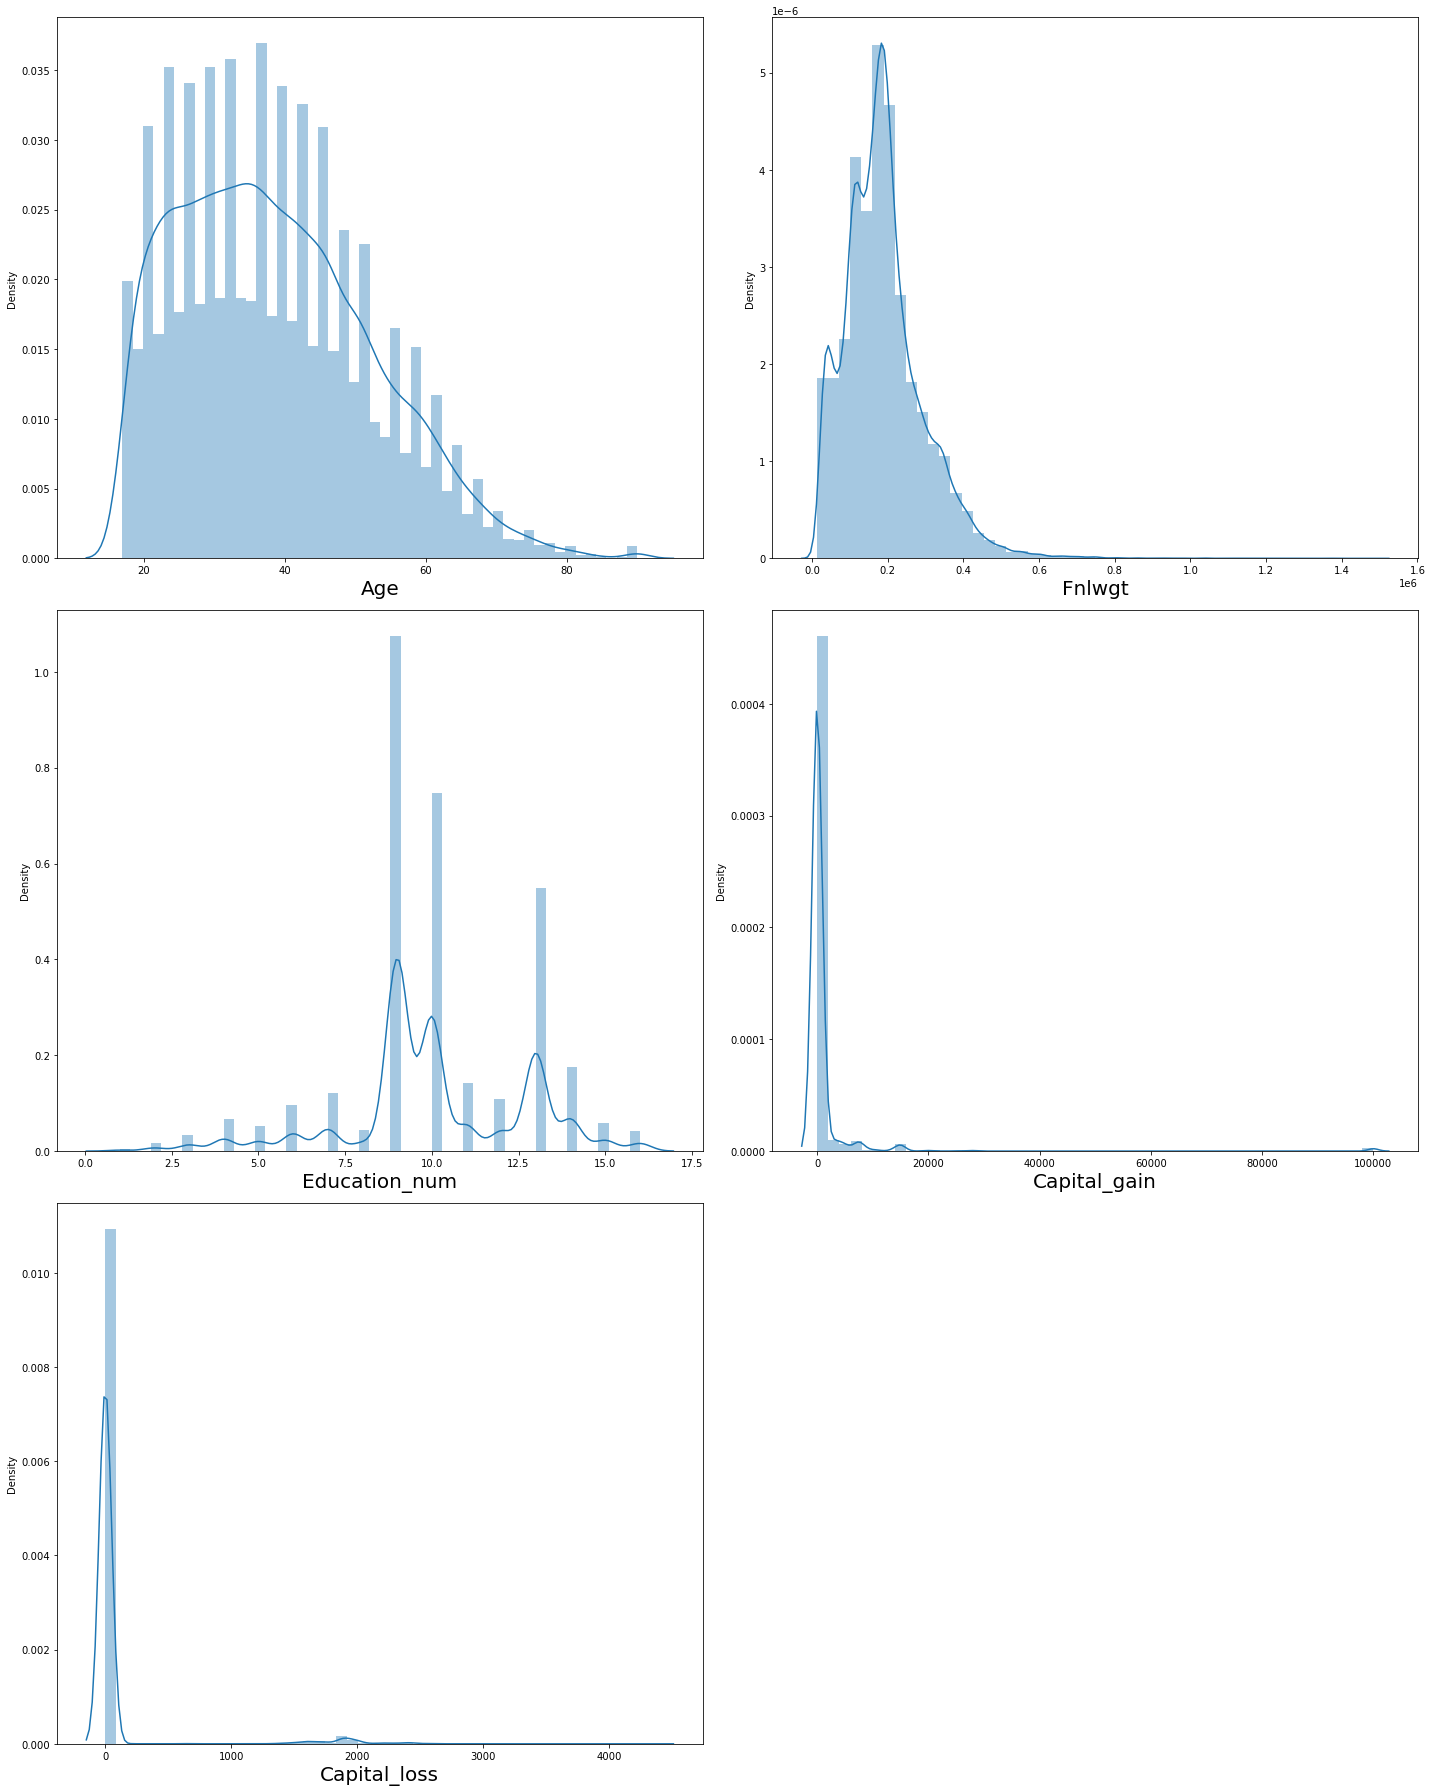

In [79]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in df_numerical:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.distplot(df_numerical[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.tight_layout()

Age, Fnlwgt, Captial_gain and Capital_loss is right skewed whereas Education_num is left skewed 

<AxesSubplot:xlabel='Income', ylabel='count'>

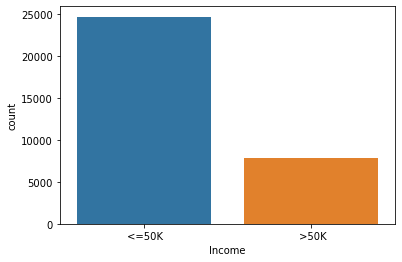

In [80]:
sns.countplot(df['Income'])

Around 25000 people have less than <=50K income and around 5500 have more than 50k income

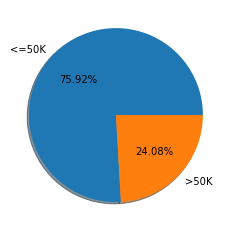

In [81]:
labels='<=50K','>50K'

fig,ax=plt.subplots()
ax.pie(df['Income'].value_counts(),labels=labels,autopct='%1.2f%%',shadow=True)

plt.show()

Around 76% have their income <=50K while only 24% have their income >50K

# Bivariate Analysis

<AxesSubplot:xlabel='Income', ylabel='count'>

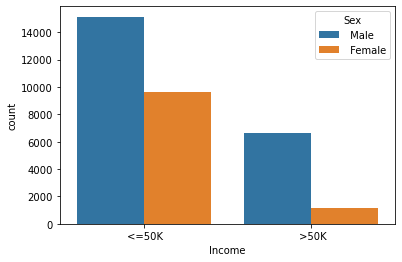

In [85]:
sns.countplot(x='Income',hue='Sex',data=df)

In both the categories, Male are the highest bread earners

<AxesSubplot:xlabel='Income', ylabel='count'>

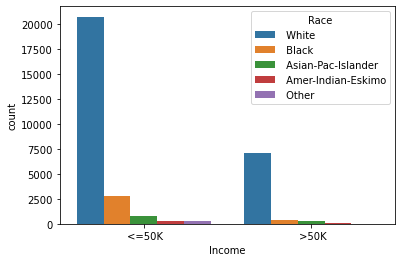

In [86]:
sns.countplot(x='Income',hue='Race',data=df)

We see white people are the most bread earners for <=50K as well as >50K

<AxesSubplot:xlabel='Income', ylabel='count'>

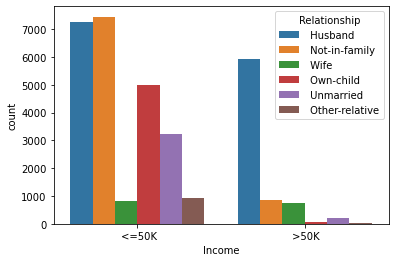

In [87]:
sns.countplot(x='Income',hue='Relationship',data=df)

We see 'Not-in-family' category have the most number of income of <=50K where as in >50K Income most are Husbands

<AxesSubplot:xlabel='Income', ylabel='count'>

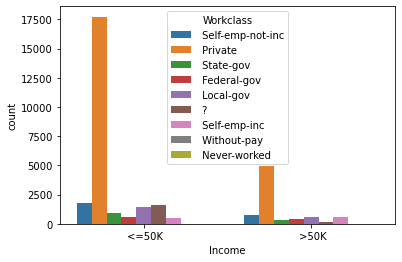

In [88]:
sns.countplot(x='Income',hue='Workclass',data=df)

Private sector employees are the most in both the groups

<AxesSubplot:xlabel='Income', ylabel='count'>

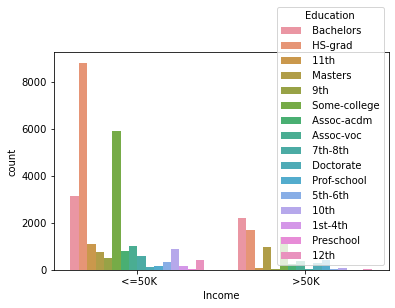

In [89]:
sns.countplot(x='Income',hue='Education',data=df)

There are more number of High School Graduates in the category <=50K whereas the Bachelors are more in the category >50K

# Preprocessing

## Replacing Null Values

In [101]:
df['Workclass']=df['Workclass'].replace(' ?',df['Workclass'].mode()[0])
df['Occupation']=df['Occupation'].replace(' ?',df['Occupation'].mode()[0])
df['Native_country']=df['Native_country'].replace(' ?',df['Native_country'].mode()[0])

We have successfully replaced the null values by taking the mode of respective variables

## Encoding

In [102]:
#Converting strings into numberical format

from sklearn.preprocessing import LabelEncoder

lab_enc=LabelEncoder()

df1=lab_enc.fit_transform(df['Workclass'])
df2=lab_enc.fit_transform(df['Education'])
df3=lab_enc.fit_transform(df['Marital_status'])
df4=lab_enc.fit_transform(df['Occupation'])
df5=lab_enc.fit_transform(df['Relationship'])
df6=lab_enc.fit_transform(df['Race'])
df7=lab_enc.fit_transform(df['Sex'])
df8=lab_enc.fit_transform(df['Native_country'])
df9=lab_enc.fit_transform(df['Income'])

df['Workclass']=df1
df['Education']=df2
df['Marital_status']=df3
df['Occupation']=df4
df['Relationship']=df5
df['Race']=df6
df['Sex']=df7
df['Native_country']=df8
df['Income']=df9

In [94]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0


We can see we have succesfully encoded the string values

In [103]:
df.drop(columns=['Education'],axis=1,inplace=True)

Education and Education_num gives the same kind of data. So dropping one of them.

# Multivariate Analysis

## Checking for correlation

In [105]:
corr_mat=df.corr()
corr_mat.shape

(14, 14)

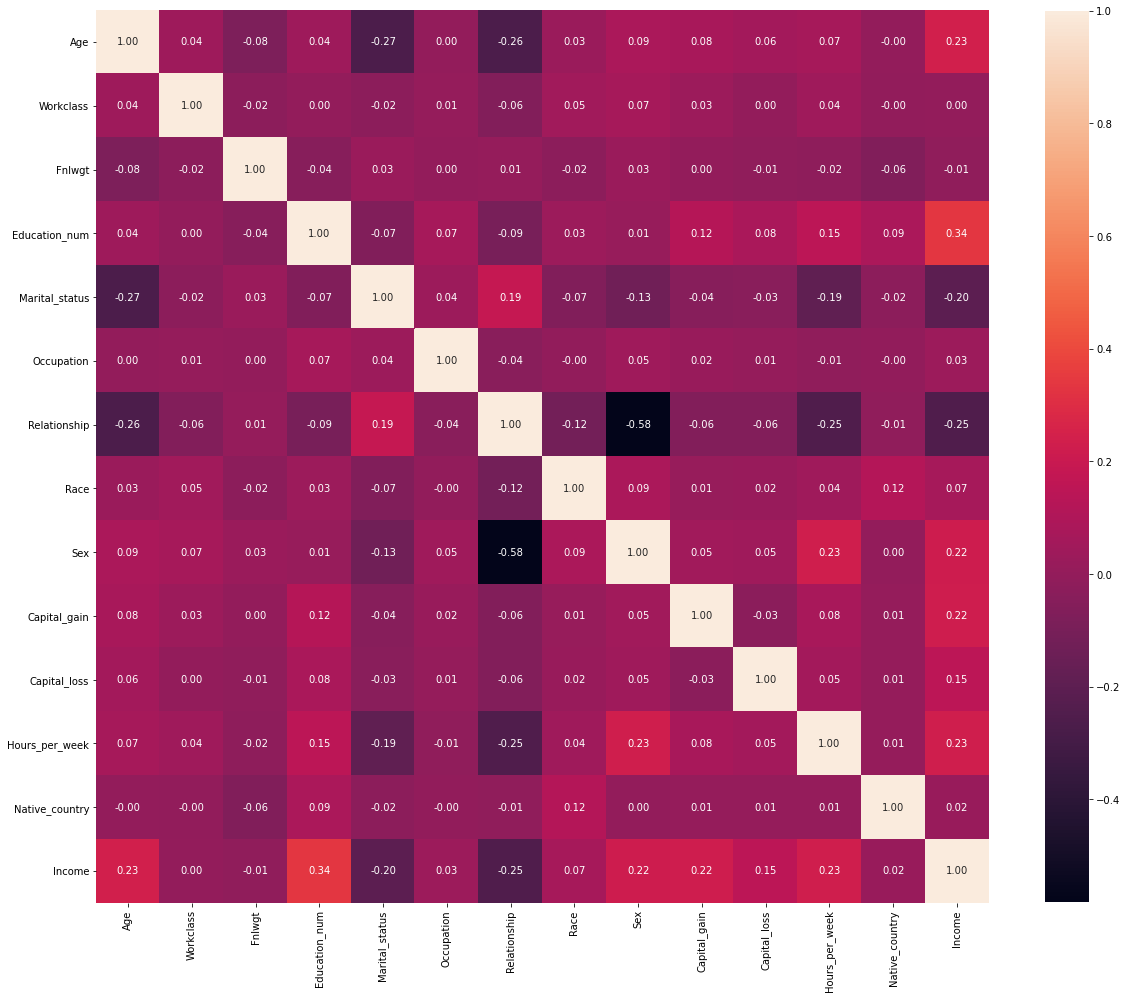

In [107]:
#plotting the heatmap of correlation between features

plt.figure(figsize=(20,20))

sns.heatmap(corr_mat,cbar=True,square=True,cbar_kws={'shrink':0.82},fmt='.2f',annot=True,annot_kws={'size':10})
plt.show()

We dont find any high correlation with the target variable

## Finding Outliers

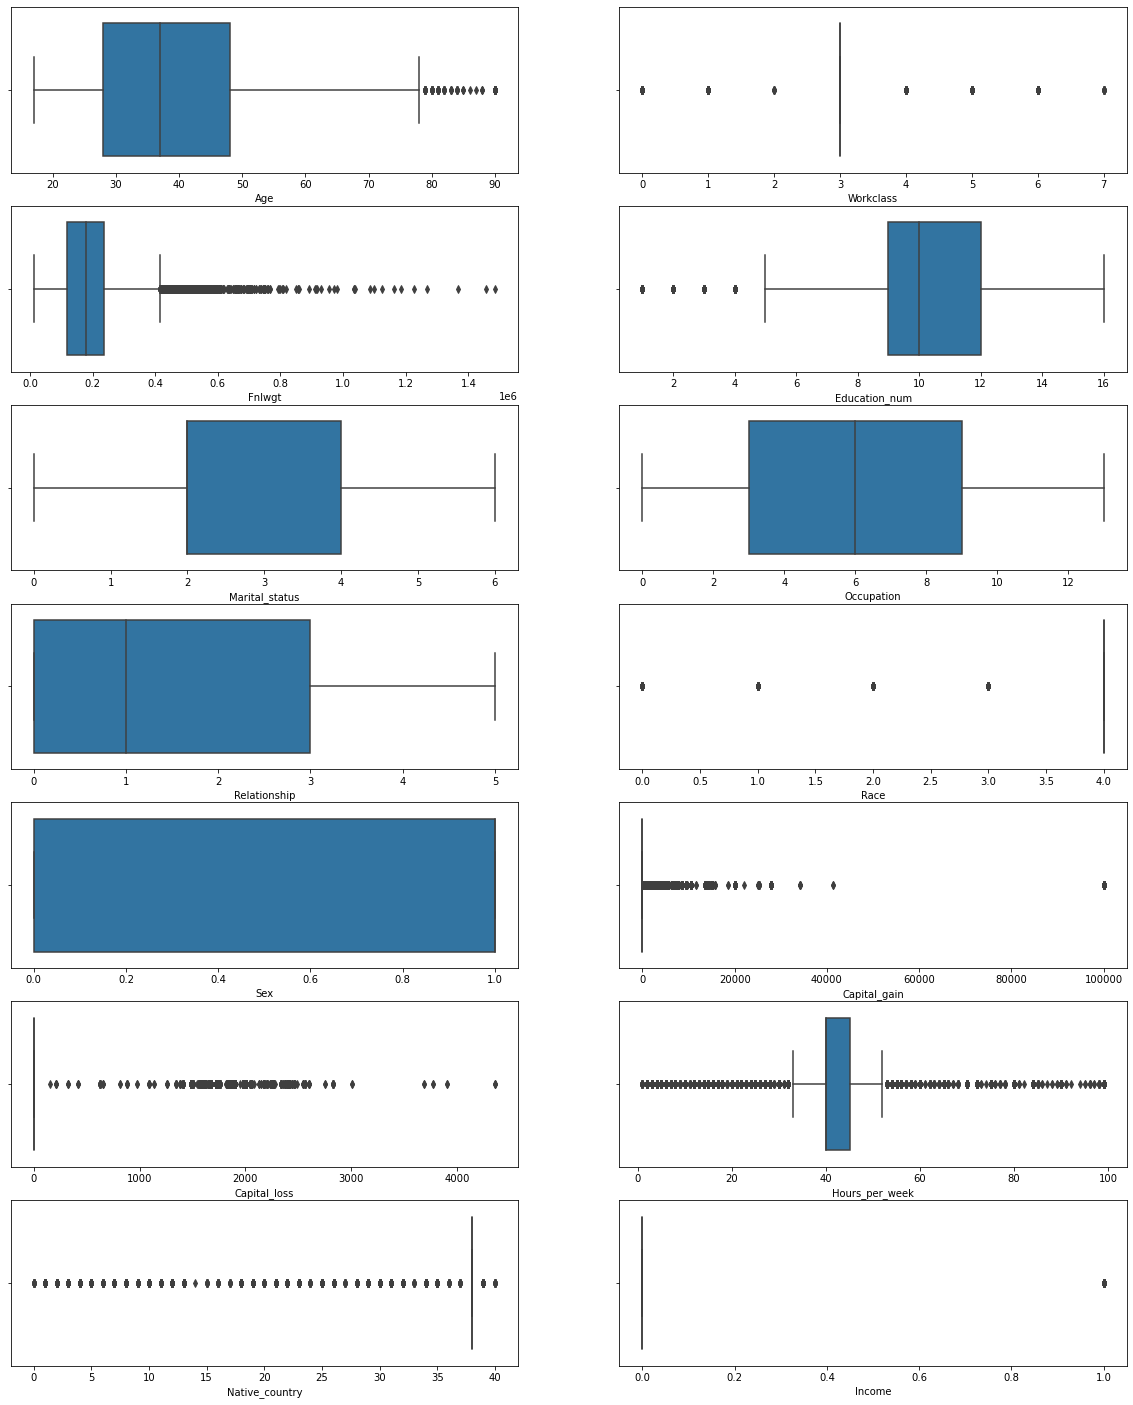

In [6]:
plt.figure(figsize=(20,25))
graph=1

for column in df:
    if(graph<=14):
        ax=plt.subplot(7,2,graph)
        sns.boxplot(df[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

As we can see there are many outliers in the numerical data

## Removing Outliers

In [23]:
from scipy.stats import zscore

z_score=zscore(df[['Age','Education_num','Fnlwgt']])
abs_z_score=np.abs(z_score)

filtering_entry=(abs_z_score<3).all(axis=1)
df=df[filtering_entry]

df.describe()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,31884.000000,31884.000000,31884.000000,31884.000000,31884.000000,31884.000000,31884.000000,31884.000000,31884.000000,31884.000000,31884.000000,31884.000000,31884.000000,31884.000000
mean,38.402835,3.095220,184882.164722,10.142078,2.604598,6.139725,1.448156,3.669207,0.668517,1084.682850,87.682129,40.502321,36.497209,0.242755
std,13.359261,1.110535,94451.290725,2.484127,1.503357,3.980146,1.608630,0.846648,0.470754,7430.133047,402.956226,12.306511,5.932555,0.428755
min,17.000000,0.000000,12285.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,3.000000,117405.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.000000,177287.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,47.000000,3.000000,233954.250000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,79.000000,7.000000,506329.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


In [24]:
df.shape

(31884, 14)

In [111]:
(32560-31884)/32560*100

2.076167076167076

We have lost around 2% of data which is affordable

## Checking Skewness

In [25]:
df.skew()

Age                0.475149
Workclass          0.075486
Fnlwgt             0.632605
Education_num     -0.156630
Marital_status    -0.019369
Occupation        -0.000451
Relationship       0.784153
Race              -2.458058
Sex               -0.715991
Capital_gain      11.901788
Capital_loss       4.551875
Hours_per_week     0.234897
Native_country    -4.377823
Income             1.200038
dtype: float64

There is skewness in Fnlwgt, Capital_gain and Capital_loss

## Removing Skewness

In [27]:
df['Fnlwgt'] = np.sqrt(df['Fnlwgt'])
df['Capital_gain'] = np.sqrt(df['Capital_gain'])
df['Capital_loss'] = np.sqrt(df['Capital_loss'])

In [28]:
df.skew()

Age               0.475149
Workclass         0.075486
Fnlwgt           -0.107435
Education_num    -0.156630
Marital_status   -0.019369
Occupation       -0.000451
Relationship      0.784153
Race             -2.458058
Sex              -0.715991
Capital_gain      5.895210
Capital_loss      4.357256
Hours_per_week    0.234897
Native_country   -4.377823
Income            1.200038
dtype: float64

Still Capital_gain and Captal_loss are skewed

In [29]:
X=df.drop(columns=['Income'],axis=1)
y=df['Income']

Splitting the data into independent and dependent variables

In [30]:
#Balancing the class

from imblearn.over_sampling import SMOTE
SM=SMOTE()
X,y=SM.fit_resample(X,y)

y.value_counts()

1    24144
0    24144
Name: Income, dtype: int64

The target variable is now balanced

In [31]:
#Standardizing

scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)

#Checking Multicollinearity by vif

vif=pd.DataFrame()
vif['score']=[variance_inflation_factor(X_scaler,i) for i in range(X_scaler.shape[1])]
vif['Features']=X.columns

vif

,score,Features
0,1.172260,Age
1,1.007299,Workclass
2,1.009504,Fnlwgt
3,1.091368,Education_num
4,1.143433,Marital_status
5,1.013891,Occupation
6,1.798378,Relationship
7,1.040530,Race
8,1.613835,Sex
9,1.059639,Capital_gain


No collinearity issue

# Model Training

## Finding the best random state

In [32]:
maxAccu=0
maxRs=0
for i in range(1,200):
    X_train,x_test,Y_train,y_test=train_test_split(X_scaler,y,test_size=0.25,random_state=i)
    mod=DecisionTreeClassifier()
    mod.fit(X_train,Y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("Best accuracy is:",maxAccu,"on Random State",maxRs)

Best accuracy is: 0.8559476474486415 on Random State 185


In [33]:
X_train,x_test,Y_train,y_test=train_test_split(X_scaler,y,test_size=0.25,random_state=185)

Splitting into Train and Test data

### Checking accuracy by using different models

In [34]:
DTC=DecisionTreeClassifier()
DTC.fit(X_train,Y_train)
pred=DTC.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      5991
           1       0.85      0.86      0.86      6081

    accuracy                           0.85     12072
   macro avg       0.85      0.85      0.85     12072
weighted avg       0.85      0.85      0.85     12072



The accuracy for Decision Tree Classifier is 85%

In [35]:
RFC=RandomForestClassifier()
RFC.fit(X_train,Y_train)
pred=RFC.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89      5991
           1       0.88      0.90      0.89      6081

    accuracy                           0.89     12072
   macro avg       0.89      0.89      0.89     12072
weighted avg       0.89      0.89      0.89     12072



The accuracy for Random Forest Classifier is 89%

In [36]:
SV=SVC()
SV.fit(X_train,Y_train)
pred=SV.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83      5991
           1       0.81      0.90      0.85      6081

    accuracy                           0.84     12072
   macro avg       0.85      0.84      0.84     12072
weighted avg       0.85      0.84      0.84     12072



The accuracy for Support Vector Classifier is 84%

In [37]:
lr=LogisticRegression()
lr.fit(X_train,Y_train)
pred=lr.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77      5991
           1       0.77      0.78      0.78      6081

    accuracy                           0.77     12072
   macro avg       0.77      0.77      0.77     12072
weighted avg       0.77      0.77      0.77     12072



The accuracy for Logistic Regression is 77%

In [38]:
ada=AdaBoostClassifier()
ada.fit(X_train,Y_train)
pred=ada.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      5991
           1       0.83      0.86      0.84      6081

    accuracy                           0.84     12072
   macro avg       0.84      0.84      0.84     12072
weighted avg       0.84      0.84      0.84     12072



The accuracy for AdaBoost Classifier is 84%

In [39]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
pred=knn.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      5991
           1       0.83      0.88      0.85      6081

    accuracy                           0.85     12072
   macro avg       0.85      0.85      0.85     12072
weighted avg       0.85      0.85      0.85     12072



The accuracy for KNeighborsClassifier is 85%

## Cross Validation

In [40]:
print(cross_val_score(DTC,X_scaler,y,cv=5).mean())

0.8490317625342367


In [41]:
print(cross_val_score(RFC,X_scaler,y,cv=5).mean())

0.8855212736604615


In [42]:
print(cross_val_score(SV,X_scaler,y,cv=5).mean())

0.844579087552931


In [43]:
print(cross_val_score(lr,X_scaler,y,cv=5).mean())

0.7723661451098416


In [44]:
print(cross_val_score(ada,X_scaler,y,cv=5).mean())

0.8359018947111005


In [45]:
print(cross_val_score(knn,X_scaler,y,cv=5).mean())

0.8495077835742355


The difference between all the models is same but F1 Score for RFC is the highest so we choose RFC as the best model

## Hyperparameter Tuning

In [46]:
parameters={'n_estimators':[200,700],
           'max_features':['auto','sqrt','log2'],
           'criterion':['gini', 'entropy'],
           'max_depth':[4,5,6,7,8]}

In [47]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [48]:
GCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 700]})

In [49]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 700}

In [50]:
Final_model=RandomForestClassifier(n_estimators=700,max_features='sqrt',criterion='gini',max_depth=8)
Final_model.fit(X_train,Y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy:',acc*100)

Accuracy: 84.89893969516235


After Hyperparameter tuning, the accuracy is nearly 85%, it was 89% earlier due to overfitting of the model.

## Plotting AUC ROC Curve

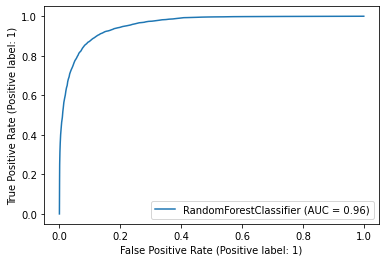

In [51]:
plot_roc_curve(RFC,x_test,y_test)
plt.show()

The AUC score is 0.96

## Saving the model

In [114]:
import joblib
joblib.dump(Final_model,"FinalModelCensus.pkl")

['FinalModelCensus.pkl']

## Loading the model

In [115]:
mod=joblib.load("FinalModelCensus.pkl")
prediction=mod.predict(x_test)
prediction=pd.DataFrame(prediction)
prediction.to_csv('Results.csv',index=False)